This pipeline generates data visualization for the HRSA dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install s3fs
!pip install boto3
!pip install pandasql

import s3fs
import boto3
import pandasql as ps

     |████████████████████████████████| 132 kB 7.9 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 46.3 MB/s 
     |████████████████████████████████| 8.1 MB 37.0 MB/s 
     |████████████████████████████████| 160 kB 46.5 MB/s 
     |████████████████████████████████| 192 kB 48.0 MB/s 
     |████████████████████████████████| 271 kB 46.4 MB/s 
     |████████████████████████████████| 138 kB 36.7 MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-2.0.1-py3-none-any.whl size=51992 sha256=2dc24c77248b7e3d628721673b57264e5ad90cc3e5d841e7d322d15124d4b184
  Stored in directory: /root/.cache/pip/wheels/56/cd/99/917ef1080ec8cc6f1c903f4622761689c3886bc49306855a0e
Successfully built aiobotocore
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the pack

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practicum/v1/df')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# using this column to tally counts
df['Count'] = 1

In [ ]:
# this is the number of reports in the dataframe, used to find percentages below
num_reports = df['Count'].count()

In [ ]:
df

,SEQNO,RECTYPE,REPTYPE,ORIGYEAR,WORKSTAT,LICNSTAT,LICNFELD,PRACTAGE,GRAD,ALEGATN1,OUTCOME,MALYEAR1,TOTALPMT,AAYEAR,TOTALPMT_FLOAT,Year,INF_FACTOR,TOTALPMT_ADJ,BASE_YEAR,PRACTEXP,PRACTEXP_ADJ,PRACTEXP_GROUP,TOTALPMT_GROUP,TOTALPMT_ADJ_GROUP,Label_ALEGATN1,Label_LICNFELD,Label_OUTCOME,PMT,COUNT,Count
0,1,A,301,1991,OK,OK,10,60.0,1950.0,NaN,NaN,NaN,NaN,1990.0,NaN,1991,1.976468,NaN,1990.0,40.0,40.0,40.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1,1
1,2,A,301,1991,OK,OK,10,40.0,1960.0,NaN,NaN,NaN,NaN,1990.0,NaN,1991,1.976468,NaN,1990.0,30.0,30.0,30.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1,1
2,4,A,301,1991,MA,MA,15,30.0,1980.0,NaN,NaN,NaN,NaN,1990.0,NaN,1991,1.976468,NaN,1990.0,10.0,10.0,10.0,NaN,NaN,NaN,Physician Resident (MD),NaN,0,1,1
3,6,A,301,1990,OK,OK,10,40.0,1970.0,NaN,NaN,NaN,NaN,1990.0,NaN,1990,2.059640,NaN,1990.0,20.0,20.0,20.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1,1
4,8,A,301,1990,OK,OK,10,40.0,1970.0,NaN,NaN,NaN,NaN,1990.0,NaN,1990,2.059640,NaN,1990.0,20.0,20.0,20.0,NaN,NaN,NaN,Allopathic Physician (MD),NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557696,1945008,C,302,2020,NaN,CA,100,40.0,2000.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,20.0,20.0,20.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1,1
1557697,1945009,C,302,2020,NaN,NM,100,40.0,2010.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,10.0,10.0,10.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1,1
1557698,1945010,C,302,2020,NaN,NM,100,40.0,2010.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,10.0,10.0,10.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1,1
1557699,1945011,C,302,2020,NaN,NM,100,30.0,2010.0,NaN,NaN,NaN,NaN,2020.0,NaN,2020,1.040122,NaN,2020.0,10.0,10.0,10.0,NaN,NaN,NaN,Registered Nurse,NaN,0,1,1


**I. Adverse Action vs. Medical Malpractice**

In [ ]:
df['Label_PMT'] = df['PMT'].apply(lambda x: 'Malpractice Payment' if x == 1 else 'Adverse Action')

In [ ]:
vis_df = df.groupby('Label_PMT').count()
vis_df['Report Type'] = vis_df.index
vis_df = vis_df[['Report Type', 'Count']]
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)
vis_df

,Report Type,Count,Percentage
Label_PMT,,,
Adverse Action,Adverse Action,1333775,85.624584
Malpractice Payment,Malpractice Payment,223926,14.375416


Text(0, 0.5, '')

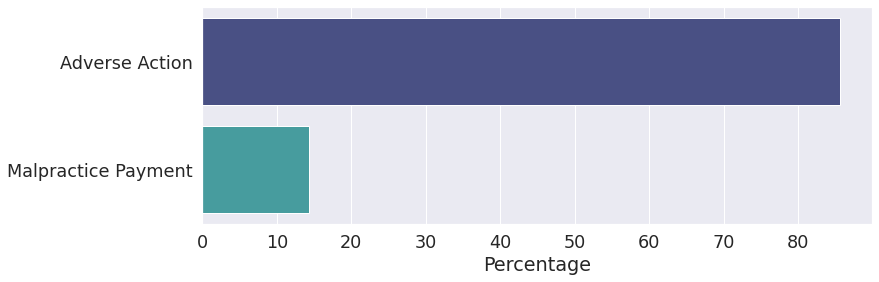

In [ ]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.barplot(x = 'Percentage', y = 'Report Type', data = vis_df, palette="mako")
ax.set_ylabel('')

**II. Payment Group**

TOTALPMT

In [ ]:
vis_df = df.groupby(by = 'TOTALPMT_GROUP').count()
vis_df['Payment Group'] = vis_df.index
vis_df = vis_df[['Payment Group', 'Count']]
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/vis_df['Count'].sum()) * 100)
vis_df.reset_index(drop = True, inplace = True)
vis_df

,Payment Group,Count,Percentage
0,"0 - 99,999",96628,43.151755
1,"1,000,000 - 9,999,999",8690,3.880746
2,"10,000,000 - 99,999,999",92,0.041085
3,"100,000 - 999,999",118515,52.925967
4,"100,000,000 - 999,999,999",1,0.000447


In [ ]:
vis_df = vis_df.reindex([4,2,1,3,0]).reset_index(drop= True)

In [ ]:
vis_df

,Payment Group,Count,Percentage
0,"100,000,000 - 999,999,999",1,0.000447
1,"10,000,000 - 99,999,999",92,0.041085
2,"1,000,000 - 9,999,999",8690,3.880746
3,"100,000 - 999,999",118515,52.925967
4,"0 - 99,999",96628,43.151755


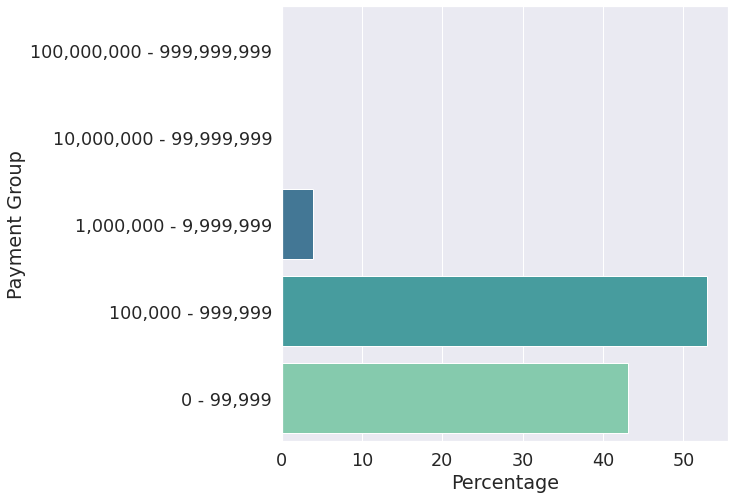

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x = 'Percentage', y = 'Payment Group', data = vis_df, palette="mako")

TOTALPMT ADJ

In [ ]:
vis_df = df.groupby(by = 'TOTALPMT_ADJ_GROUP').count()
vis_df['Payment Group'] = vis_df.index
vis_df = vis_df[['Payment Group', 'Count']]
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/vis_df['Count'].sum()) * 100)
vis_df.reset_index(drop = True, inplace = True)
vis_df

,Payment Group,Count,Percentage
0,"0 - 99,999",81413,36.357100
1,"1,000,000 - 9,999,999",21636,9.662121
2,"10,000,000 - 99,999,999",128,0.057162
3,"100,000 - 999,999",120748,53.923171
4,"100,000,000 - 999,999,999",1,0.000447


In [ ]:
vis_df = vis_df.reindex([4,2,1,3,0]).reset_index(drop= True)
vis_df

,Payment Group,Count,Percentage
0,"100,000,000 - 999,999,999",1,0.000447
1,"10,000,000 - 99,999,999",128,0.057162
2,"1,000,000 - 9,999,999",21636,9.662121
3,"100,000 - 999,999",120748,53.923171
4,"0 - 99,999",81413,36.357100


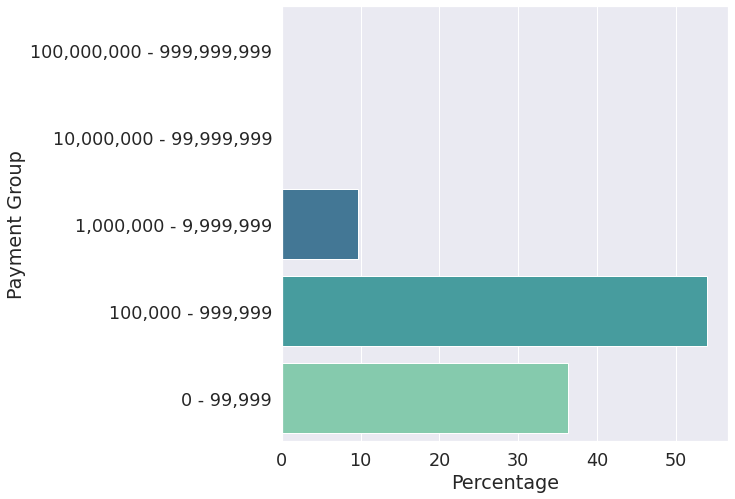

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x = 'Percentage', y = 'Payment Group', data = vis_df, palette="mako")

**III. LICNSTAT**

In [ ]:
temp_df = df.groupby(by = 'LICNSTAT', dropna = False).count()['Count']
null_rows = temp_df[np.NaN]
vis_df = pd.DataFrame(data = {'Type': ['Labeled', 'Unlabeled'], 'Count': [num_reports - null_rows, null_rows ]})
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)

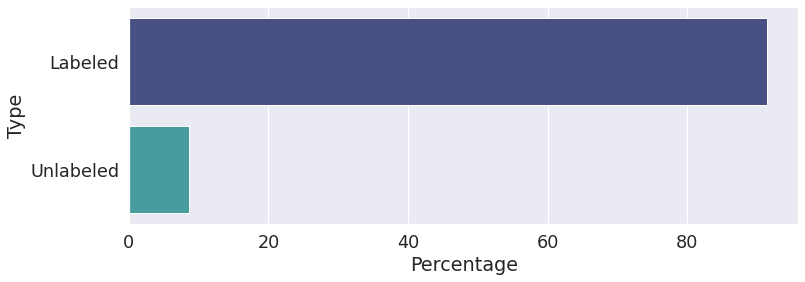

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(x = 'Percentage', y = 'Type', data = vis_df, palette="mako")

In [ ]:
vis_df = df.groupby(by = 'LICNSTAT').count()
vis_df['License State'] = vis_df.index
vis_df = vis_df[['License State', 'Count']]
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)
vis_df.reset_index(drop = True, inplace = True)
vis_df.sort_values(by = 'Count', ascending = False, inplace = True)
vis_df

,License State,Count,Percentage
49,TX,133533,8.572441
5,CA,133061,8.542140
38,NY,96661,6.205363
10,FL,80683,5.179620
42,PA,70577,4.530844
39,OH,60907,3.910057
25,MI,51801,3.325478
17,IL,49047,3.148679
35,NJ,43805,2.812157
51,VA,40818,2.620400


In [ ]:
# trim the data just to show the top 10
vis_df = vis_df[:20]

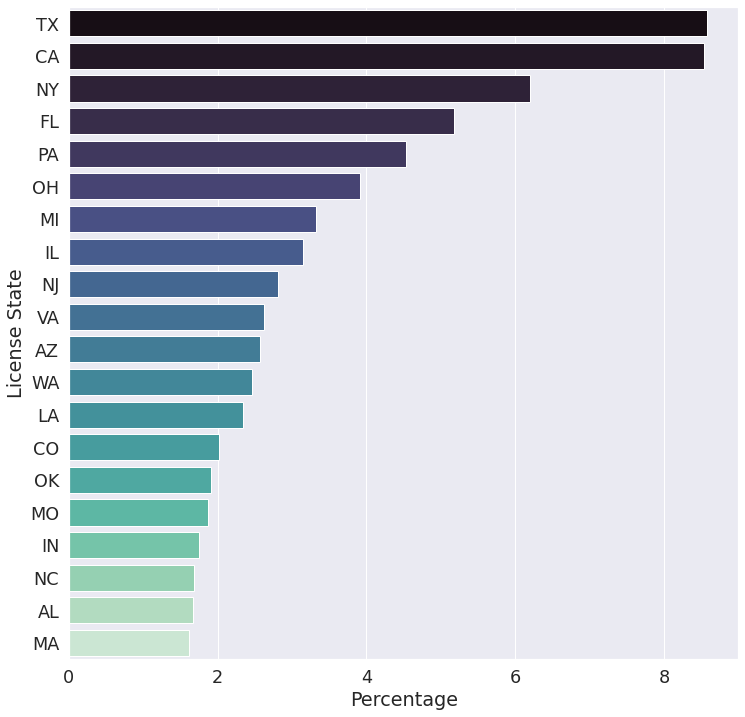

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.barplot(x = 'Percentage', y = 'License State', data = vis_df, palette="mako")

**IV. WORKSTAT**

In [ ]:
temp_df = df.groupby(by = 'WORKSTAT', dropna = False).count()['Count']
null_rows = temp_df[np.NaN]
vis_df = pd.DataFrame(data = {'Type': ['Labeled', 'Unlabeled'], 'Count': [num_reports - null_rows, null_rows ]})
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)

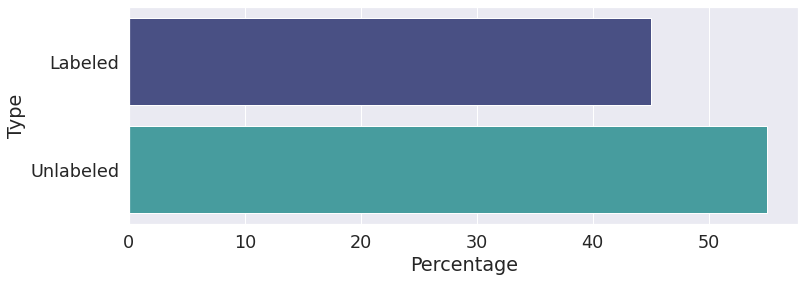

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(x = 'Percentage', y = 'Type', data = vis_df, palette="mako")

In [ ]:
vis_df = df.groupby(by = 'WORKSTAT').count()
vis_df['Work State'] = vis_df.index
vis_df = vis_df[['Work State', 'Count']]
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)
vis_df.reset_index(drop = True, inplace = True)
vis_df.sort_values(by = 'Count', ascending = False, inplace = True)
vis_df

,Work State,Count,Percentage
8,CA,73836,4.740062
41,NY,65923,4.232070
52,TX,51199,3.286831
13,FL,42183,2.708029
45,PA,40617,2.607497
...,...,...,...
6,AS,15,0.000963
31,MP,12,0.000770
0,AA,6,0.000385
14,FM,4,0.000257


In [ ]:
# trim the data just to show the top 10
vis_df = vis_df[:20]

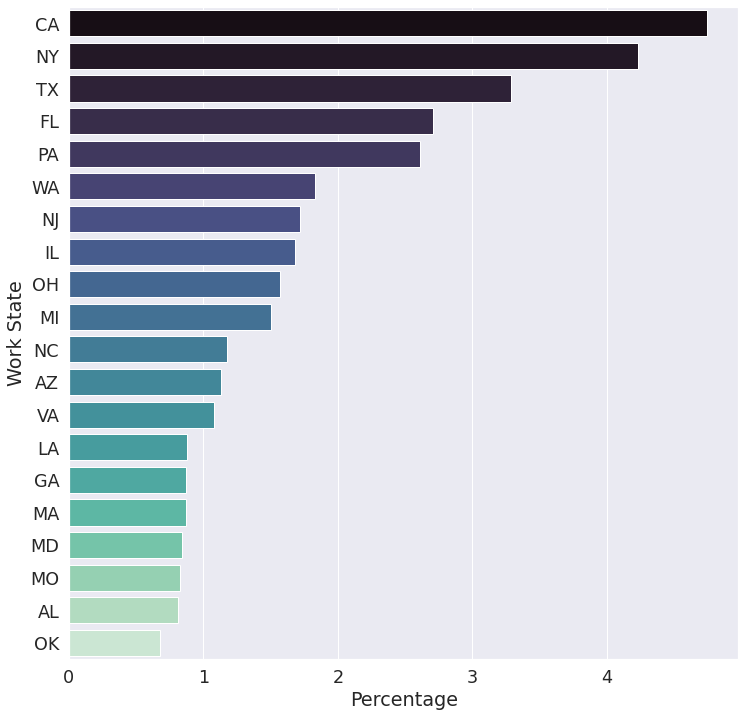

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.barplot(x = 'Percentage', y = 'Work State', data = vis_df, palette="mako")

**V. PRACTAGE**

In [ ]:
temp_df = df.groupby(by = 'PRACTAGE', dropna = False).count()['Count']
null_rows = temp_df[np.NaN]
vis_df = pd.DataFrame(data = {'Type': ['Labeled', 'Unlabeled'], 'Count': [num_reports - null_rows, null_rows ]})
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)

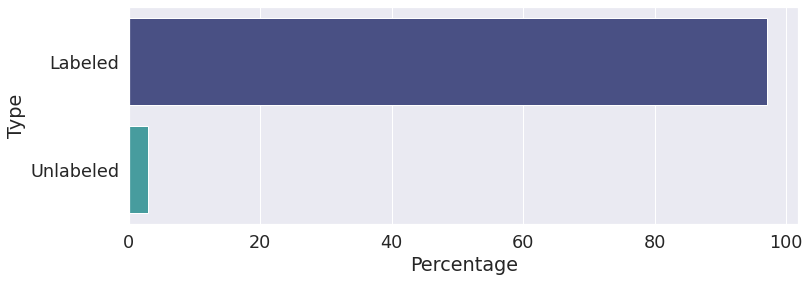

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(x = 'Percentage', y = 'Type', data = vis_df, palette="mako")

In [ ]:
vis_df = df.groupby(by = 'PRACTAGE').count()
vis_df['Practitioner Age Group'] = vis_df.index
vis_df = vis_df[['Practitioner Age Group', 'Count']]
vis_df['Practitioner Age Group'] = vis_df['Practitioner Age Group'].apply(lambda x: str(int(x)))
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)
vis_df.reset_index(drop = True, inplace = True)
vis_df.sort_values(by = 'Practitioner Age Group', ascending = False, inplace = True)
vis_df

,Practitioner Age Group,Count,Percentage
7,80,8269,0.530846
6,70,38379,2.463823
5,60,174679,11.213898
4,50,363875,23.359746
3,40,459553,29.502003
2,30,359186,23.058726
1,20,106372,6.828782
0,10,1201,0.077101


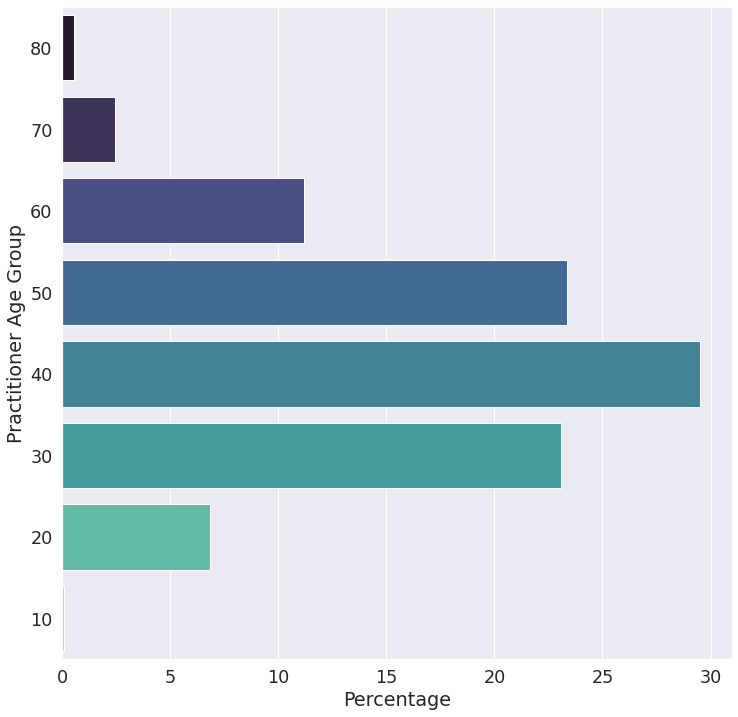

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.barplot(x = 'Percentage', y = 'Practitioner Age Group', data = vis_df, palette="mako")

**VI. PRACTEXP**

In [ ]:
temp_df = df.groupby(by = 'PRACTEXP_GROUP', dropna = False).count()['Count']
null_rows = temp_df[np.NaN]
vis_df = pd.DataFrame(data = {'Type': ['Labeled', 'Unlabeled'], 'Count': [num_reports - null_rows, null_rows]})
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)

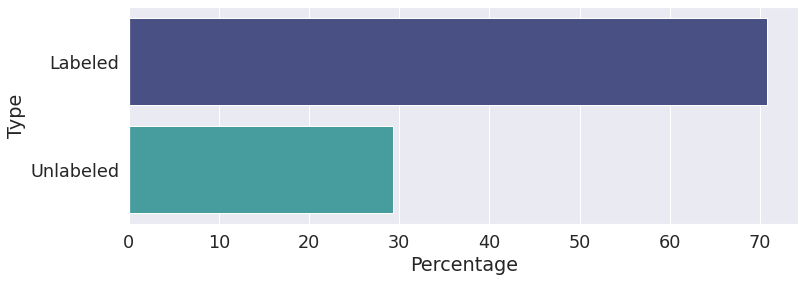

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(x = 'Percentage', y = 'Type', data = vis_df, palette="mako")

In [ ]:
vis_df = df.groupby(by = 'PRACTEXP_GROUP').count()
vis_df['Practitioner Experience Group'] = vis_df.index
vis_df = vis_df[['Practitioner Experience Group', 'Count']]
vis_df['Practitioner Experience Group'] = vis_df['Practitioner Experience Group'].apply(lambda x: str(int(x)))
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)
vis_df.reset_index(drop = True, inplace = True)
vis_df.sort_values(by = 'Practitioner Experience Group', ascending = False, inplace = True)
vis_df

,Practitioner Experience Group,Count,Percentage
7,70,253,0.016242
6,60,3401,0.218335
5,50,22918,1.471271
4,40,88465,5.679203
3,30,179466,11.521210
2,20,271194,17.409888
1,10,343843,22.073748
0,0,192345,12.348005


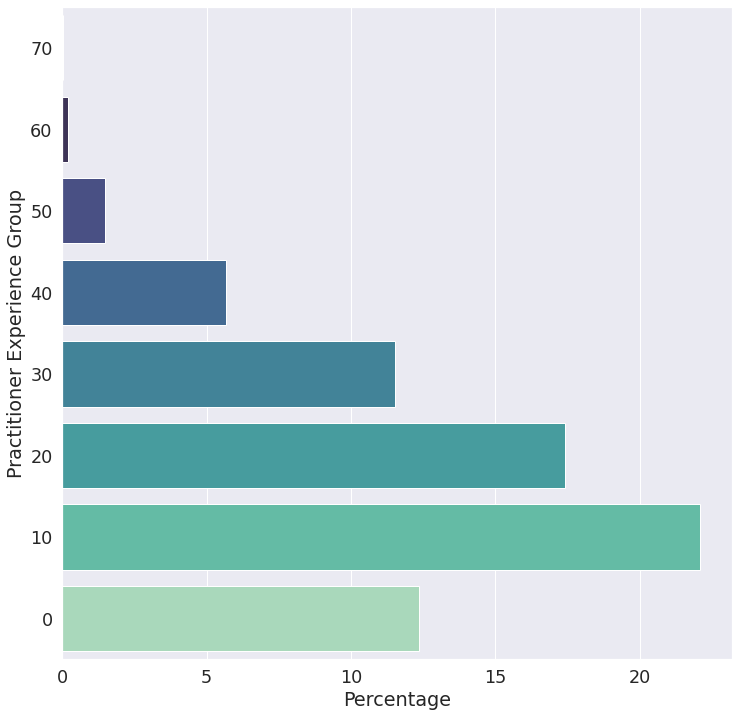

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.barplot(x = 'Percentage', y = 'Practitioner Experience Group', data = vis_df, palette="mako")

**VII. LICNFELD**

In [ ]:
temp_df = df.groupby(by = 'Label_LICNFELD', dropna = False).count()['Count']
null_rows = temp_df['Unspecified or Unknown']
vis_df = pd.DataFrame(data = {'Type': ['Labeled', 'Unlabeled'], 'Count': [num_reports - null_rows, null_rows]})
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)

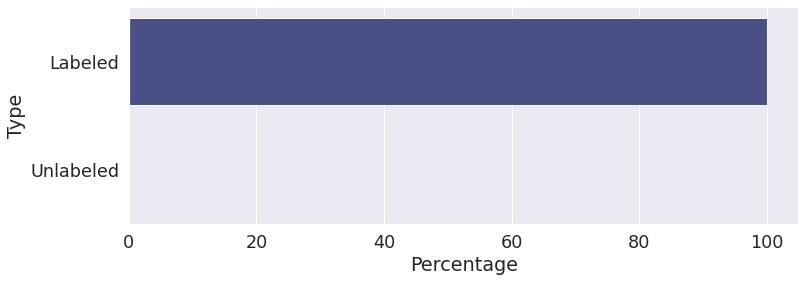

In [ ]:
# virtually all rows in LICNFELD is labeled
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(x = 'Percentage', y = 'Type', data = vis_df, palette="mako")

In [ ]:
vis_df = df.groupby(by = 'Label_LICNFELD').count()
vis_df['License Field'] = vis_df.index
vis_df = vis_df[['License Field', 'Count']]

vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)
vis_df.reset_index(drop = True, inplace = True)
vis_df.sort_values(by = 'Count', ascending = False, inplace = True)
vis_df

,License Field,Count,Percentage
7,Allopathic Physician (MD),497388,31.930903
143,Registered Nurse,278950,17.907801
59,LPN or Vocational Nurse,166942,10.717204
34,Dentist,97322,6.247797
76,Nurse Aide/Nursing Assistant,87249,5.601139
...,...,...,...
33,Dental Therapist/Dental Health Aide [available...,3,0.000193
112,Pastoral Counselor [available 11/17/2014],2,0.000128
73,Music Therapist [available 11/17/2014],1,0.000064
89,Organ Procurement Organization,1,0.000064


In [ ]:
# trim to top 20
vis_df = vis_df[:20]

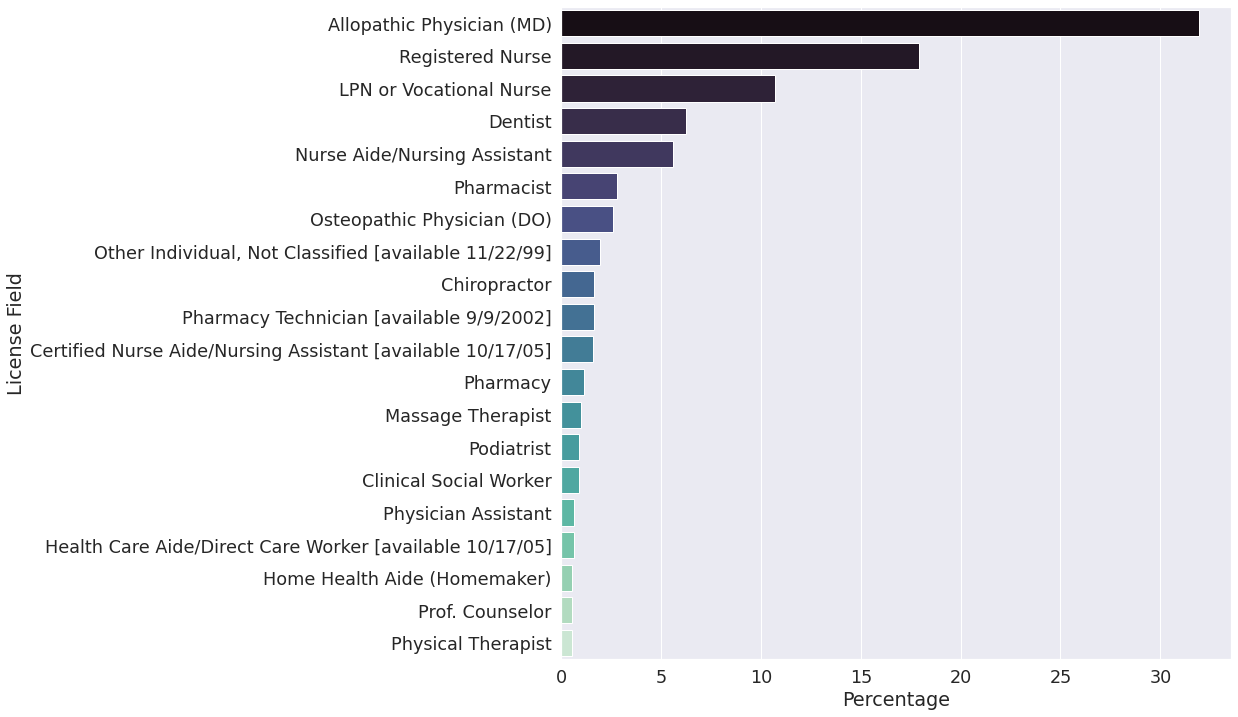

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.barplot(x = 'Percentage', y = 'License Field', data = vis_df, palette="mako")

**VIII. ALEGATN1**

In [ ]:
temp_df = df.groupby(by = 'Label_ALEGATN1', dropna = False).count()['Count']
null_rows = temp_df[np.NaN]
vis_df = pd.DataFrame(data = {'Type': ['Labeled', 'Unlabeled'], 'Count': [num_reports - null_rows, null_rows]})
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)

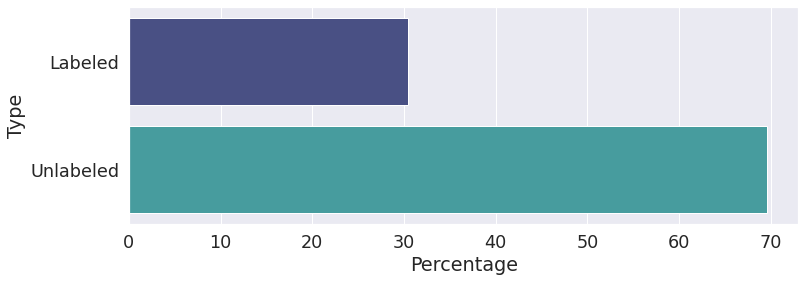

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(x = 'Percentage', y = 'Type', data = vis_df, palette="mako")

In [ ]:
vis_df = df.groupby(by = 'Label_ALEGATN1').count()
vis_df['Allegation Type'] = vis_df.index
vis_df = vis_df[['Allegation Type', 'Count']]

vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)
vis_df.reset_index(drop = True, inplace = True)
vis_df.sort_values(by = 'Count', ascending = False, inplace = True)
vis_df

,Allegation Type,Count,Percentage
3,"Allegation – Not Otherwise Classified, Specify",83648,5.369965
20,Failure to Diagnose,77037,4.945558
47,Improper Performance,68668,4.408291
46,Improper Management,33300,2.137766
12,Delay in Diagnosis,29063,1.865762
...,...,...,...
4,"Altered, Misplaced or Prematurely Destroyed Re...",22,0.001412
73,Third Party Claimant,15,0.000963
58,Negligent Credentialing,8,0.000514
63,Practitioner with Communicable Disease,7,0.000449


In [ ]:
# drop 'Allegation - Not Otherwise Classified, Specify' type, which is basically the same as null
vis_df.drop(vis_df[vis_df['Allegation Type'] == 'Allegation – Not Otherwise Classified, Specify'].index, inplace = True)

In [ ]:
# top 20
vis_df = vis_df[:20]

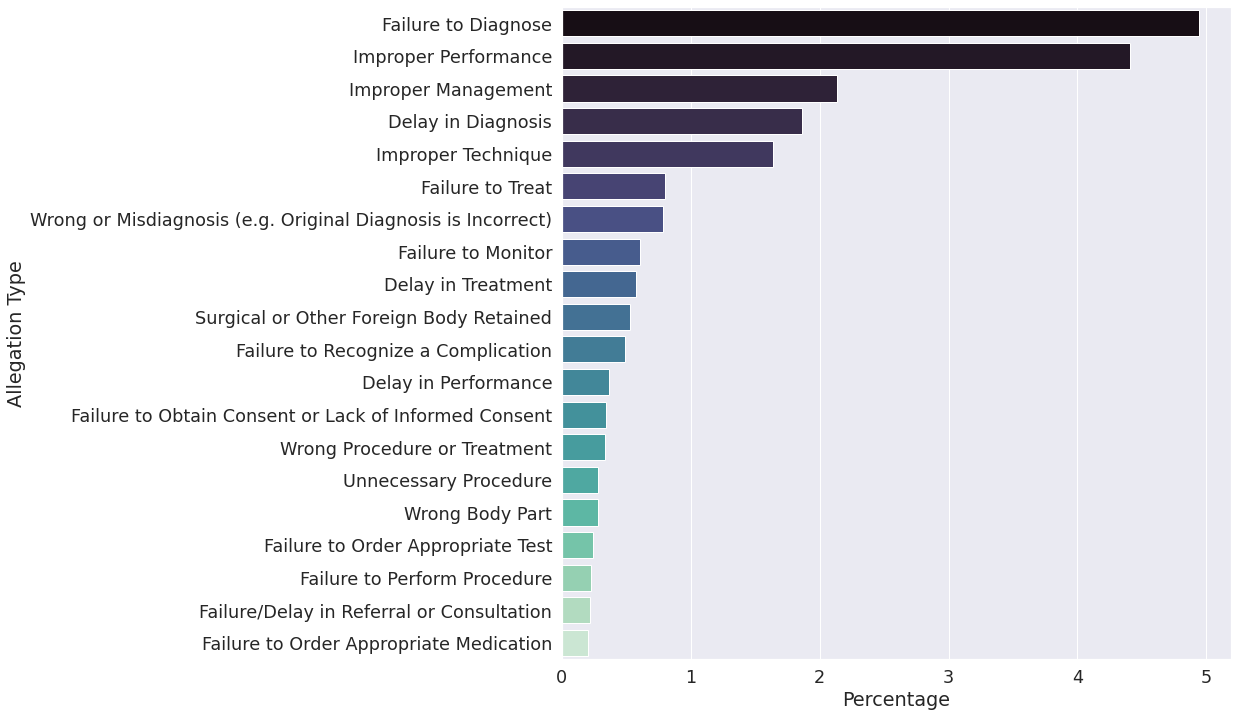

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.barplot(x = 'Percentage', y = 'Allegation Type', data = vis_df, palette="mako")

**IX. OUTCOME**


In [ ]:
temp_df = df.groupby(by = 'Label_OUTCOME', dropna = False).count()['Count']
null_rows = temp_df[np.NaN]
vis_df = pd.DataFrame(data = {'Type': ['Labeled', 'Unlabeled'], 'Count': [num_reports - null_rows, null_rows]})
vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)

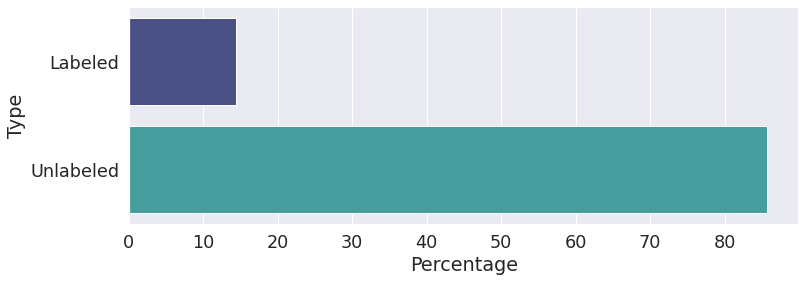

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.barplot(x = 'Percentage', y = 'Type', data = vis_df, palette="mako")

In [ ]:
vis_df = df.groupby(by = 'Label_OUTCOME').count()
vis_df['Outcome'] = vis_df.index
vis_df = vis_df[['Outcome', 'Count']]

vis_df['Percentage'] = vis_df['Count'].apply(lambda x: (x/num_reports) * 100)
vis_df.reset_index(drop = True, inplace = True)
#vis_df.sort_values(by = 'Outcome', ascending = False, inplace = True)
vis_df

,Outcome,Count,Percentage
0,Cannot Be Determined from Available Records,2905,0.186493
1,Death,61793,3.966936
2,Emotional Injury Only,4669,0.299737
3,Insignificant Injury,6528,0.419079
4,Major Permanent Injury,21853,1.402901
5,Major Temporary Injury,23908,1.534826
6,Minor Permanent Injury,28057,1.801180
7,Minor Temporary Injury,33716,2.164472
8,"Quadriplegic, Brain Damage, Lifelong Care",10002,0.642100
9,Significant Permanent Injury,30495,1.957693


In [ ]:
vis_df = vis_df.reindex([2,3,7,5,6,9,4,8,1,0]).reset_index(drop= True)
vis_df

,Outcome,Count,Percentage
0,Emotional Injury Only,4669,0.299737
1,Insignificant Injury,6528,0.419079
2,Minor Temporary Injury,33716,2.164472
3,Major Temporary Injury,23908,1.534826
4,Minor Permanent Injury,28057,1.801180
5,Significant Permanent Injury,30495,1.957693
6,Major Permanent Injury,21853,1.402901
7,"Quadriplegic, Brain Damage, Lifelong Care",10002,0.642100
8,Death,61793,3.966936
9,Cannot Be Determined from Available Records,2905,0.186493


In [ ]:
# drop 'Allegation - Not Otherwise Classified, Specify' type, which is basically the same as null
vis_df.drop(vis_df[vis_df['Outcome'] == 'Cannot Be Determined from Available Records'].index, inplace = True)

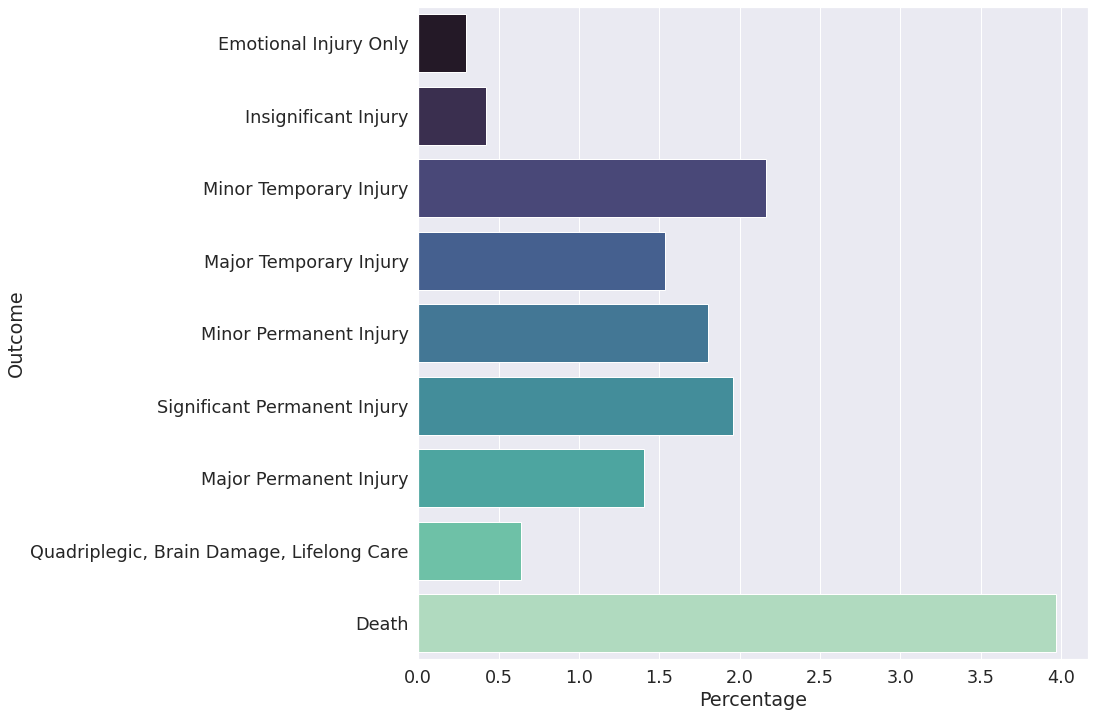

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.barplot(x = 'Percentage', y = 'Outcome', data = vis_df, palette="mako")